# Оглавление
[1. Первичный анализ и предобработка данных](#Первичный-анализ)<br>
&emsp;[1.1 Calls](#calls)<br>
&emsp;[1.2 Internet](#internet)<br>
&emsp;[1.3 Messages](#messages)<br>
&emsp;[1.4 Users](#users)<br>
[2. Расчет показателей по месяцам](#calc)<br>
[3. Расчет выручки](#revenue)<br>
[4. Анализ поведения абонентов](#behaviour)<br>
[5. Проверка гипотез](#hypothesis)<br>
&emsp;[5.1 Выручка по тарифам](#tariffs)<br>
&emsp;[5.2 Выручка по городам](#cities)<br>
[6. Выводы](#summary)<br>

<a id='Первичный-анализ'></a>
## Первичный анализ и предобработка данных
Проанализируем каждый датасет на наличие пропусков, дубликатов и выбросов.

<a id='calls'></a>
### Calls

In [102]:
import pandas as pd
import numpy as np
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

df_calls = pd.read_csv('/datasets/calls.csv')
df_internet = pd.read_csv('/datasets/internet.csv')
df_messages = pd.read_csv('/datasets/messages.csv')
df_tariffs = pd.read_csv('/datasets/tariffs.csv')
df_users = pd.read_csv('/datasets/users.csv')

df_calls.info()
print('Всего дубликатов:', df_calls.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
Всего дубликатов: 0


Таблица содержит 202607 наблюдений, пропуски и дубликаты отсутствуют.   
Также можно заметить, что дата звонка представлена в формате "object", а должна быть в формате date. Исправим это.

In [103]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')

Далее рассмотрим числовой показатель - продолжительность звонка, а также построим гистограмму.

In [104]:
df_calls['duration'].describe()

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

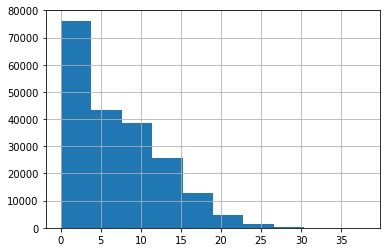

In [105]:
df_calls['duration'].hist()

Медианное значение звонка - 6 минут, минимальное значение (0) соответствует входящим звонкам. Аномальных значений в выборке нет.

<a id='internet'></a>
### Internet

In [106]:
df_internet.info()
print('Всего дубликатов:', df_internet.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
Всего дубликатов: 0


Аналогично, нет ни пропусков, ни дубликатов, формат даты также нужно поменять.

In [107]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')

Рассмотрим распределение интернет-траффика.

In [108]:
df_internet['mb_used'].describe()

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

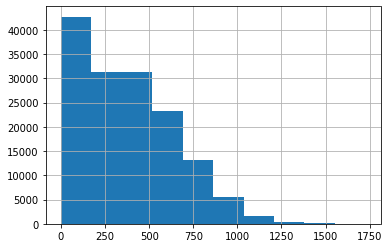

In [109]:
df_internet['mb_used'].hist()

Медианное значение - 348 мб, при этом в выборке присутствуют дни, когда абонент не пользовался интернетом вовсе. Максимальный траффик - 1724 мб, что также вполне реально. Таким образом, аномальных значений нет.

<a id='messages'></a>
### Messages

In [110]:
df_messages.info()
print('Всего дубликатов:', df_messages.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
Всего дубликатов: 0


Поменяем тип данных у столбца message_date.

In [111]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')

<a id='users'></a>
### Users

In [112]:
df_users.info()
print('Всего дубликатов:', df_users.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
Всего дубликатов: 0


В данных об абонентах нет пропусков за исключением столбца churn date. Предполагаем, что если дата не указана, то абонент еще пользуется услугами. Изменим тип данных у полей с датами.

In [113]:
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


Проанализируем данные по возрасту.

In [114]:
df_users['age'].describe()

count    500.00000
mean      46.58800
std       16.66763
min       18.00000
25%       32.00000
50%       46.00000
75%       62.00000
max       75.00000
Name: age, dtype: float64

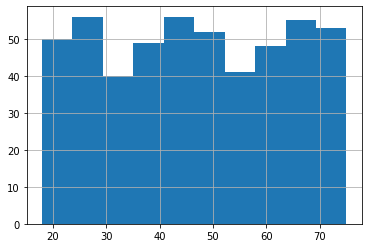

In [115]:
df_users['age'].hist()

Минимальный возраст - 18, максимальный - 75. Аномальных значений не обнаружено.

<a id='calc'></a>
## Расчет показателей по месяцам
По условиям задачи, все звонки округляются в бОльшую сторону. Произведем соответствующие расчеты и изменим тип на целочисленный. Также для дальнейшего анализа нам необходимо получить таблицу, содержащую данные абонентов и их ежемесячное использование услуг связи. Для этого с каждым из датасетов проделаем следующие шаги:
1. Выделим год и месяц
2. Сгруппируем числовые данные по id -> год -> месяц

In [116]:
#calls
df_calls['duration'] = df_calls['duration'].apply(np.ceil)
df_calls['duration'] = df_calls['duration'].astype('int')
df_calls['year'] = pd.DatetimeIndex(df_calls['call_date']).year
df_calls['month'] = pd.DatetimeIndex(df_calls['call_date']).month
df_calls_pivot = df_calls.pivot_table(index=['user_id', 'year', 'month'], values='duration', aggfunc='sum')

#internet
df_internet['year'] = pd.DatetimeIndex(df_internet['session_date']).year
df_internet['month'] = pd.DatetimeIndex(df_internet['session_date']).month
df_internet_pivot = df_internet.pivot_table(index=['user_id', 'year', 'month'], values='mb_used', aggfunc='sum')

#messages
df_messages['year'] = pd.DatetimeIndex(df_messages['message_date']).year
df_messages['month'] = pd.DatetimeIndex(df_messages['message_date']).month
df_messages_pivot = df_messages.pivot_table(index=['user_id', 'year', 'month'], values='id', aggfunc='count')

Объединим таблицы в одну, содержащую объем использованных услуг по месяцам.

In [117]:
df_activities_by_month = df_calls_pivot.merge(df_internet_pivot['mb_used'], on=['user_id', 'year', 'month'], how='outer')
df_activities_by_month = df_activities_by_month.merge(df_messages_pivot['id'], on=['user_id', 'year', 'month'], how='outer')
df_activities_by_month.columns = ['calls_min', 'internet_mb', 'messages']

Проанализируем получившийся датасет на предмет пропусков и дубликатов.

In [118]:
df_activities_by_month.info()
print('Всего дубликатов:', df_messages.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3214 entries, (1000, 2018, 5) to (1489, 2018, 12)
Data columns (total 3 columns):
calls_min      3174 non-null float64
internet_mb    3203 non-null float64
messages       2717 non-null float64
dtypes: float64(3)
memory usage: 92.0 KB
Всего дубликатов: 0


Как можно заметить, для части пользователей отсутствуют данные по сообщениям и интернет-траффику. Взглянем на них подробнее.

In [119]:
display(df_activities_by_month.query('internet_mb != internet_mb'))

calls_min  internet_mb  messages
user_id year month                                  
1273    2018 5          220.0          NaN      21.0
             6          230.0          NaN      38.0
             7          253.0          NaN      37.0
             8          253.0          NaN      41.0
             9          223.0          NaN      32.0
             10         315.0          NaN      35.0
             11         272.0          NaN      29.0
             12         260.0          NaN      39.0
1377    2018 2          179.0          NaN       2.0
1392    2018 2           13.0          NaN       3.0
1446    2018 8           50.0          NaN       1.0

- Данные по интернет-траффику отсутствуют целиком для одного абонента и для трех по 1 месяцу. Поскольку 11 пропусков составляют 0.3% выборки, ими можно пренебречь.  
- Сообщения фиксируются в системе только по факту отправки => пропуски будем считать за 0.

In [120]:
df_activities_by_month['messages'] = df_activities_by_month['messages'].fillna(0)
df_activities_by_month = df_activities_by_month.dropna()
df_activities_by_month.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3163 entries, (1000, 2018, 5) to (1499, 2018, 12)
Data columns (total 3 columns):
calls_min      3163 non-null float64
internet_mb    3163 non-null float64
messages       3163 non-null float64
dtypes: float64(3)
memory usage: 90.6 KB


По условиям тарифа, кол-во гигабайт в месяц также округляется вверх - сделаем это.

In [121]:
df_activities_by_month['internet_gb'] = df_activities_by_month['internet_mb'] / 1024
df_activities_by_month['internet_gb'] = df_activities_by_month['internet_gb'].apply(np.ceil)
df_activities_by_month['internet_gb'] = df_activities_by_month['internet_gb'].astype('int')
df_activities_by_month = df_activities_by_month.drop('internet_mb', 1)
df_activities_by_month['messages'] = df_activities_by_month['messages'].astype('int')

#проверим данные для одного из абонентов
df_activities_by_month = df_activities_by_month.reset_index()
df_activities_by_month.info()
display(df_activities_by_month.query('user_id == 1000'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 6 columns):
user_id        3163 non-null int64
year           3163 non-null int64
month          3163 non-null int64
calls_min      3163 non-null float64
messages       3163 non-null int64
internet_gb    3163 non-null int64
dtypes: float64(1), int64(5)
memory usage: 148.4 KB


,user_id,year,month,calls_min,messages,internet_gb
0,1000,2018,5,159.0,22,3
1,1000,2018,6,172.0,60,23
2,1000,2018,7,340.0,75,14
3,1000,2018,8,408.0,81,14
4,1000,2018,9,466.0,57,15
5,1000,2018,10,350.0,73,15
6,1000,2018,11,338.0,58,15
7,1000,2018,12,333.0,70,10


<a id='revenue'></a>
## Расчет выручки

Далее к каждой записи подтянем данные, необходимые для дальнейшего анализа:
- users. city, tariff
- tariffs. таблица целиком

In [122]:
#подтянем город и тариф абонентов
df_activities_by_month = pd.merge(df_activities_by_month, df_users, on=['user_id'], how='left')
df_activities_by_month = df_activities_by_month.drop(['age', 'churn_date', 'first_name', 'last_name', 'reg_date'],1)

#подтянем данные по тарифу
df_activities_by_month.rename(columns={'tariff':'tariff_name'}, inplace=True)
df_activities_by_month = pd.merge(df_activities_by_month, df_tariffs, on='tariff_name', how='left')

Переведем mb_per_month_included в gb.

In [123]:
df_activities_by_month['gb_per_month_included'] = (df_activities_by_month['mb_per_month_included'] / 1024).astype('int')
df_activities_by_month = df_activities_by_month.drop('mb_per_month_included', 1)

Далее посчитаем выручку.

In [124]:
df = df_activities_by_month
df['revenue'] = 0
for index in range(len(df)):
    df['revenue'][index] = (df['rub_monthly_fee'][index] + 
    max(0, (df['calls_min'][index] - df['minutes_included'][index])) * df['rub_per_minute'][index] +
    max(0, (df['messages'][index] - df['messages_included'][index])) * df['rub_per_message'][index] +
    max(0, (df['internet_gb'][index] - df['gb_per_month_included'][index])) * df['rub_per_gb'][index])

#проверим датасет для одного абонента
display(df_activities_by_month.query('user_id == 1000'))

,user_id,year,month,calls_min,messages,internet_gb,city,tariff_name,messages_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,revenue
0,1000,2018,5,159.0,22,3,Краснодар,ultra,1000,3000,1950,150,1,1,30,1950
1,1000,2018,6,172.0,60,23,Краснодар,ultra,1000,3000,1950,150,1,1,30,1950
2,1000,2018,7,340.0,75,14,Краснодар,ultra,1000,3000,1950,150,1,1,30,1950
3,1000,2018,8,408.0,81,14,Краснодар,ultra,1000,3000,1950,150,1,1,30,1950
4,1000,2018,9,466.0,57,15,Краснодар,ultra,1000,3000,1950,150,1,1,30,1950
5,1000,2018,10,350.0,73,15,Краснодар,ultra,1000,3000,1950,150,1,1,30,1950
6,1000,2018,11,338.0,58,15,Краснодар,ultra,1000,3000,1950,150,1,1,30,1950
7,1000,2018,12,333.0,70,10,Краснодар,ultra,1000,3000,1950,150,1,1,30,1950


<a id='behaviour'></a>
## Анализ поведения абонентов

1. Разделим выборку на две: тарифы "Smart" и "Ultra". 
2. Посчитаем среднее, дисперсию и стандартное отклонение для каждого из показателей.

In [125]:
df_smart = df.query('tariff_name == "smart"')
df_smart.name = 'Smart'
df_ultra = df.query('tariff_name == "ultra"')
df_ultra.name = 'Ultra'

In [126]:
lst_df = [df_smart, df_ultra]
lst_metrics = ['calls_min', 'messages', 'internet_gb']

for df in lst_df:
    var = 0
    print(df.name)
    display(df[lst_metrics].describe())
    for element in lst_metrics:
        var = np.var(df[element])
        print(f'Дисперсия {element} равна {var:.1f}')
    print()

Smart


,calls_min,messages,internet_gb
count,2222.000000,2222.000000,2222.000000
mean,419.229073,33.410891,16.337084
std,189.206167,28.257434,5.743447
min,0.000000,0.000000,0.000000
25%,285.000000,10.000000,13.000000
50%,423.000000,28.000000,17.000000
75%,545.750000,51.000000,20.000000
max,1435.000000,143.000000,38.000000


Дисперсия calls_min равна 35782.9
Дисперсия messages равна 798.1
Дисперсия internet_gb равна 33.0

Ultra


,calls_min,messages,internet_gb
count,941.000000,941.000000,941.000000
mean,548.890542,49.260361,19.695005
std,306.619353,47.066174,9.735407
min,0.000000,0.000000,0.000000
25%,315.000000,5.000000,12.000000
50%,531.000000,40.000000,19.000000
75%,760.000000,79.000000,27.000000
max,1673.000000,224.000000,49.000000


Дисперсия calls_min равна 93915.5
Дисперсия messages равна 2212.9
Дисперсия internet_gb равна 94.7



В выборку тарифа Smart попали 2222 абонента, в Ultra - 941. Средние значения метрик для тарифа Ultra ожидаемо выше и имеют больший разброс в виде болле высоких значений стандартного отклонения. Поочередно построим гистограммы, чтобы проанализировать распределения на графике.

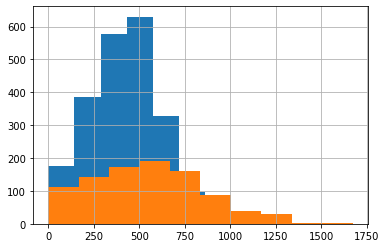

In [127]:
df_smart['calls_min'].hist()
df_ultra['calls_min'].hist()

Оба распределения - нормальные и скошены вправо, при этом для абонентов тарифа Ultra характера бОльшая вариативность в минутах, в то время как большинство абонентов тарифа Smart тратят количество минут, близкое к ограничению по тарифу (500 мин).

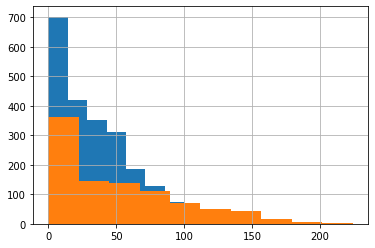

In [128]:
df_smart['messages'].hist()
df_ultra['messages'].hist()

Распределения по отправленным сообщениям очень похожи и имеют распределение Пуассона, высота столбцов отличается только засчет разного количества наблюдений в выборках. Большинство абонентов отправляет не более 50 SMS в месяц.

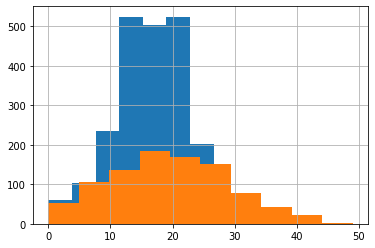

In [129]:
df_smart['internet_gb'].hist()
df_ultra['internet_gb'].hist()

Распределения использованных gb очень напоминает нормальное с медианой для обоих тарифов в районе 17-19 gb.

<a id='hypothesis'></a>
## Проверка гипотез

<a id='tariffs'></a>
### Выручка по тарифам

In [130]:
print(df_smart['revenue'].describe())
print()
print(df_ultra['revenue'].describe())

count    2222.000000
mean     1291.224572
std       819.153324
min       550.000000
25%       550.000000
50%      1032.000000
75%      1750.000000
max      6770.000000
Name: revenue, dtype: float64

count     941.000000
mean     2072.263549
std       381.229923
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4800.000000
Name: revenue, dtype: float64


Сформулируем гипотезы:   
- H0: Средняя выручка тарифа Smart равна средней выручке тарифа Ultra.
- H1: Средние выручки не равны.   
<br>
Для проверки гипотезы будем использовать t-тест для проверки равенства средних генеральных совокупностей с неравными дисперсиями, так как первичный анализ показал, что стандартные отклонения сильно отличаются по тарифам: разброс в тарифе Ultra значительно ниже.   
Критический уровень установим в 5%

In [131]:
result_tariffs = st.ttest_ind(df_smart['revenue'], df_ultra['revenue'], equal_var = False)
alpha = 0.05
print(f'p-value равно {result_tariffs.pvalue:.3f}')

if result_tariffs.pvalue > alpha:
    print('Принимаем нулевую гипотезу. Средние равны')
else:
    print('Отвергаем нулевую гипотезу. Средние не равны')

p-value равно 0.000
Отвергаем нулевую гипотезу. Средние не равны


<a id='cities'></a>
### Выручка по городам

In [132]:
df = df_activities_by_month
print(df.query('city == "Москва"')['revenue'].describe())
print()
print(df.query('city != "Москва"')['revenue'].describe())

count     610.000000
mean     1546.052459
std       752.527584
min       550.000000
25%       778.750000
50%      1750.000000
75%      1950.000000
max      5321.000000
Name: revenue, dtype: float64

count    2553.000000
mean     1518.217391
std       812.551523
min       550.000000
25%       750.000000
50%      1550.000000
75%      1950.000000
max      6770.000000
Name: revenue, dtype: float64


Стандартные отклонения достаточно близки, поэтому будем использовать тест с равенством дисперсий.

In [133]:
result_cities = st.ttest_ind(df.query('city == "Москва"')['revenue'], df.query('city != "Москва"')['revenue'], equal_var = True)
alpha = 0.05
print(f'p-value равно {result_cities.pvalue:.3f}')

if result_cities.pvalue > alpha:
    print('Не отвергаем нулевую гипотезу. Средние равны')
else:
    print('Отвергаем нулевую гипотезу. Средние не равны')

p-value равно 0.441
Не отвергаем нулевую гипотезу. Средние равны


<a id='summary'></a>
## Выводы

1. Поведение абонентов разных тарифов отличается: кол-во потраченных минут на тарифе Ultra более вариативно, на тарифе Smart сосредоточено возле ограничения тарифа в 500 минут.
2. Все абоненты отправляют мало сообщений вне зависимости от тарифа.
3. Среднее потребление интернет-траффика также очень похоже для абонентов обоих тарифов.
4. Средняя выручка тарифов статистически различается.
5. Средняя выручка в Москве статистически равна средней выручке в остальных городах.